In [2]:
import numpy as np
import matplotlib.pyplot as plt


$
\beta = (X^T X)^{-1} X^T y
$



In [3]:
def linear_regression_least_squares(X, y, k, alpha=1e-8):

    # Create the design matrix with polynomial terms up to degree k
    X = np.column_stack([X**i for i in range(k)])

    # Apply Ridge regularisation by adding alpha*I to X^T X to avoid invertible matrix
    XtX = X.T @ X + alpha * np.eye(X.shape[1])
    beta = np.linalg.inv(XtX) @ X.T @ y

    # Compute SSE
    y_pred = X @ beta
    sse = np.sum((y - y_pred) ** 2)

    return beta, y_pred, sse

In [4]:
# Define points
points = [(1, 3), (2, 2), (3, 0), (4, 5)]
X = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])

k=1: y = 2.50
MSE: 3.25
k=2: y = 1.50 + 0.40*x^1
MSE: 3.05
k=3: y = 9.00 + -7.10*x^1 + 1.50*x^2
MSE: 0.80
k=4: y = -5.00 + 15.17*x^1 + -8.50*x^2 + 1.33*x^3
MSE: 0.00


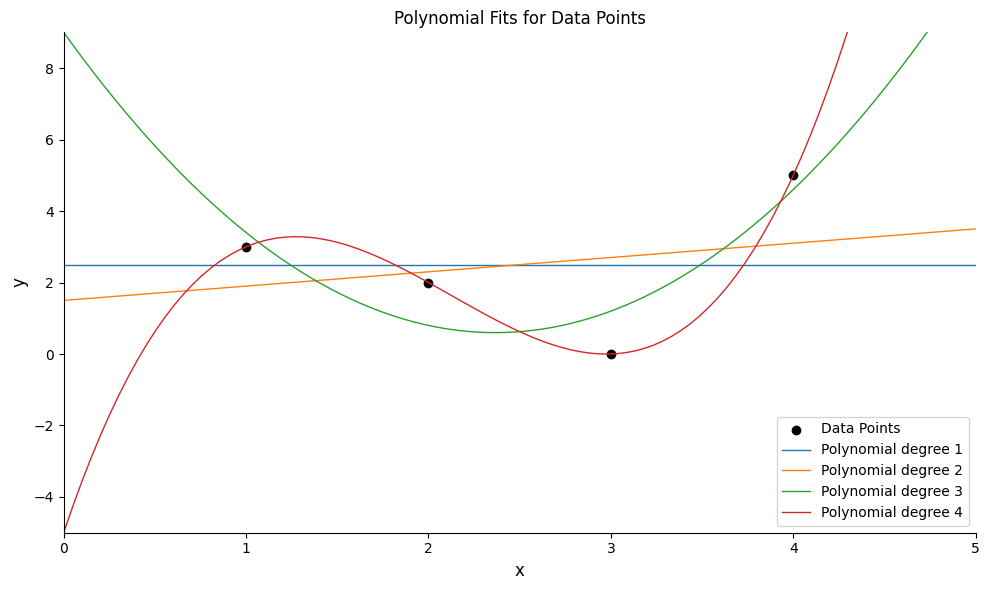

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label="Data Points")

# Plot the polynomial fits for k = 1, 2, 3, and 4
for k in range(1, 5):
    beta, y_pred, sse = linear_regression_least_squares(X, y, k)

    # Generate a smooth curve for the polynomial fit
    x_smooth = np.linspace(0, 5, 100)
    X_smooth = np.column_stack([x_smooth**i for i in range(k)])
    y_smooth = X_smooth @ beta

    # Plot the polynomial fit
    plt.plot(x_smooth, y_smooth, linewidth=1, label=f"Polynomial degree {k}")

    # Print the equation and MSE for each polynomial
    equation = " + ".join([f"{beta[i]:.2f}*x^{i}" if i > 0 else f"{beta[i]:.2f}" for i in range(len(beta))])
    print(f"k={k}: y = {equation}")
    mse = sse / len(X)
    print(f"MSE: {mse:.2f}")

# Customize the plot
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Polynomial Fits for Data Points", fontsize=12)

# Customize legend and axes
plt.legend(fontsize=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

plt.xlim(0, 5)
plt.ylim(-5, 9)
plt.tight_layout()
plt.grid(False)
plt.show()


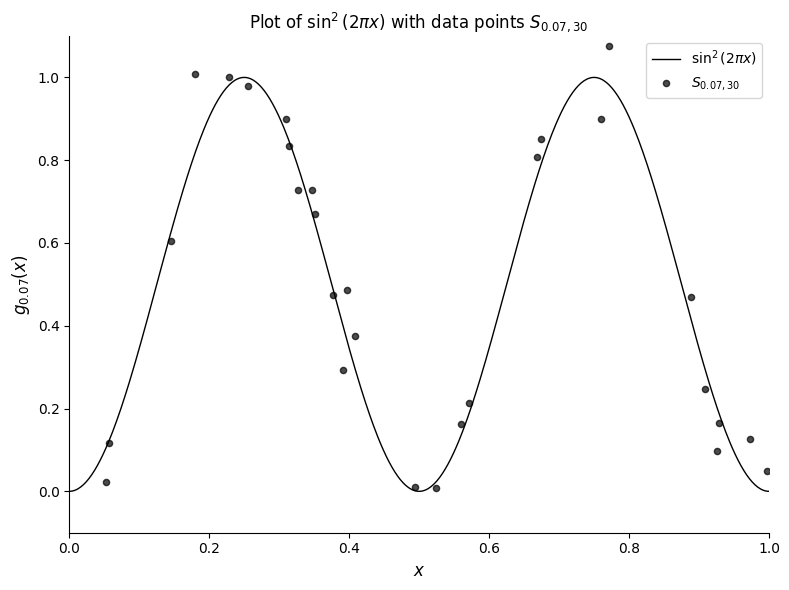

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(50)

sigma = 0.07
n_points = 30
x_range = np.linspace(0, 1, 500)

def g_sigma(x):
    return np.sin(2 * np.pi * x) ** 2

x_values = np.random.uniform(0, 1, n_points)
y_values = g_sigma(x_values) + np.random.normal(0, sigma, n_points)

plt.figure(figsize=(8, 6))

# Plot the function and points
plt.plot(x_range, g_sigma(x_range), color='black', linewidth=1, label=r'$\sin^2(2\pi x)$')
plt.scatter(x_values, y_values, s=20, color='black', alpha=0.7, label=r'$S_{0.07,30}$')

plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$g_{0.07}(x)$', fontsize=12)
plt.legend(fontsize=10)
plt.title(r'Plot of $\sin^2(2\pi x)$ with data points $S_{0.07,30}$', fontsize=12)

plt.xlim(0, 1)
plt.ylim(-0.1, 1.1)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make left and bottom spines black
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

plt.tight_layout()
plt.grid(False)

plt.show()

k=2: y = 0.65 + -0.33*x^1
MSE: 0.13
k=5: y = -0.93 + 22.98*x^1 + -92.44*x^2 + 134.94*x^3 + -64.97*x^4
MSE: 0.05
k=10: y = 0.15 + -9.10*x^1 + 174.39*x^2 + -735.10*x^3 + 989.41*x^4 + 99.58*x^5 + -862.98*x^6 + -195.92*x^7 + 889.76*x^8 + -350.05*x^9
MSE: 0.01
k=14: y = -0.03 + -3.03*x^1 + 108.69*x^2 + -435.83*x^3 + 419.77*x^4 + 271.33*x^5 + -210.51*x^6 + -337.53*x^7 + -113.74*x^8 + 151.80*x^9 + 222.53*x^10 + 77.96*x^11 + -106.56*x^12 + -44.81*x^13
MSE: 0.00
k=18: y = -0.05 + -2.02*x^1 + 96.39*x^2 + -375.60*x^3 + 304.12*x^4 + 292.05*x^5 + -84.23*x^6 + -294.41*x^7 + -221.87*x^8 + -9.65*x^9 + 166.89*x^10 + 214.21*x^11 + 134.79*x^12 + -6.82*x^13 + -127.37*x^14 + -158.78*x^15 + -67.38*x^16 + 139.80*x^17
MSE: 0.00


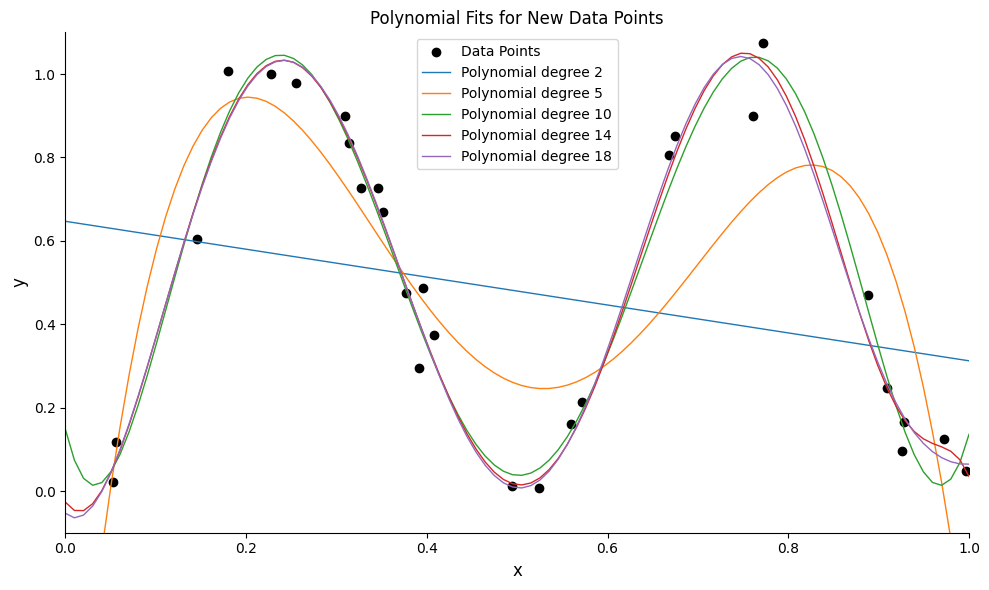

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='black', label="Data Points")

# Polynomial fits for k = 1, 2, 3, and 4
for k in [2, 5, 10, 14, 18]:
    beta, y_pred, sse = linear_regression_least_squares(x_values, y_values, k)

    # Generate smooth curve
    x_smooth = np.linspace(0, 1, 100)
    X_smooth = np.column_stack([x_smooth**i for i in range(k)])
    y_smooth = X_smooth @ beta

    # Plot the polynomial fit
    plt.plot(x_smooth, y_smooth, linewidth=1, label=f"Polynomial degree {k}")

    # Print equation and MSE
    equation = " + ".join([f"{beta[i]:.2f}*x^{i}" if i > 0 else f"{beta[i]:.2f}" for i in range(len(beta))])
    print(f"k={k}: y = {equation}")
    mse = sse / len(x_values)
    print(f"MSE: {mse:.2f}")

# Customization of plot
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Polynomial Fits for New Data Points", fontsize=12)

# Customize legend and axes
plt.legend(fontsize=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

plt.xlim(0, 1)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.grid(False)
plt.show()

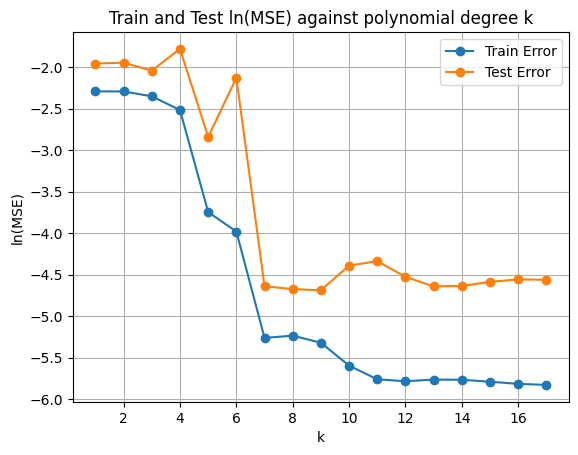

In [14]:
# Calculate ln(MSE) for train and test data for polynomial degrees k = 1 to 18
mse_train_array, mse_test_array = [], []
n_test = 1000
x_test_values = np.random.uniform(0, 1, n_test)
y_test_values = g_sigma(x_test_values) + np.random.normal(0, sigma, n_test)

for k in range(1, 18):
    beta, y_pred, sse_train = linear_regression_least_squares(x_values, y_values, k)
    mse_train_array.append(sse_train / len(x_values))

    X_test = np.column_stack([x_test_values**i for i in range(k)])
    y_test_pred = X_test @ beta
    sse_test = np.sum((y_test_values - y_test_pred) ** 2)
    mse_test_array.append(sse_test / n_test)

ln_mse_train_array, ln_mse_test_array = np.log(mse_train_array), np.log(mse_test_array)

# Plot Train and Test ln(MSE) against k
plt.plot(range(1, 18), ln_mse_train_array, marker='o', label="Train Error")
plt.plot(range(1, 18), ln_mse_test_array, marker='o', label="Test Error")
plt.xlabel('k')
plt.ylabel('ln(MSE)')
plt.title('Train and Test ln(MSE) against polynomial degree k')
plt.legend()
plt.grid(True)
plt.show()


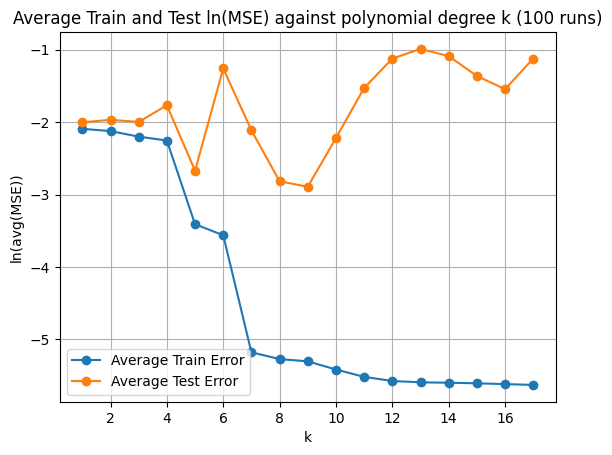

In [15]:
# Set parameters
n_runs = 100
n_test = 1000
degrees = range(1, 18)

# Initialize arrays to accumulate MSE values across runs
mse_train_sum = np.zeros(len(degrees))
mse_test_sum = np.zeros(len(degrees))

for _ in range(n_runs):
    # Generate a new training and test set for each run
    x_values = np.random.uniform(0, 1, n_points)
    y_values = g_sigma(x_values) + np.random.normal(0, sigma, n_points)

    x_test_values = np.random.uniform(0, 1, n_test)
    y_test_values = g_sigma(x_test_values) + np.random.normal(0, sigma, n_test)

    mse_train_run = []
    mse_test_run = []

    # Calculate MSE for each polynomial degree
    for k in degrees:
        # Fit the model on the training data
        beta, _, sse_train = linear_regression_least_squares(x_values, y_values, k)

        # Calculate training MSE
        mse_train = sse_train / len(x_values)
        mse_train_run.append(mse_train)

        # Apply the model to the test data
        X_test = np.column_stack([x_test_values**i for i in range(k)])
        y_test_pred = X_test @ beta
        sse_test = np.sum((y_test_values - y_test_pred) ** 2)
        mse_test = sse_test / len(x_test_values)
        mse_test_run.append(mse_test)

    # Accumulate MSE values for averaging
    mse_train_sum += np.array(mse_train_run)
    mse_test_sum += np.array(mse_test_run)

# Calculate the average MSE across all runs
avg_mse_train = mse_train_sum / n_runs
avg_mse_test = mse_test_sum / n_runs

# Calculate the ln of the average MSE values
ln_avg_mse_train = np.log(avg_mse_train)
ln_avg_mse_test = np.log(avg_mse_test)

# Plot ln(avg(MSE)) for training and test sets against k
plt.plot(degrees, ln_avg_mse_train, marker='o', label="Average Train Error")
plt.plot(degrees, ln_avg_mse_test, marker='o', label="Average Test Error")
plt.xlabel('k')
plt.ylabel('ln(avg(MSE))')
plt.title('Average Train and Test ln(MSE) against polynomial degree k (100 runs)')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
def sine_basis_lrls(X, y, k, alpha=1e-8):

    # Create the design matrix with sin(kπX) terms up to degree k
    X = np.column_stack([np.sin(k*np.pi*X) for i in range(k)])

    # Apply Ridge regularisation by adding alpha*I to X^T X to avoid invertible matrix
    XtX = X.T @ X + alpha * np.eye(X.shape[1])
    beta = np.linalg.inv(XtX) @ X.T @ y

    # Compute SSE
    y_pred = X @ beta
    sse = np.sum((y - y_pred) ** 2)

    return beta, y_pred, sse

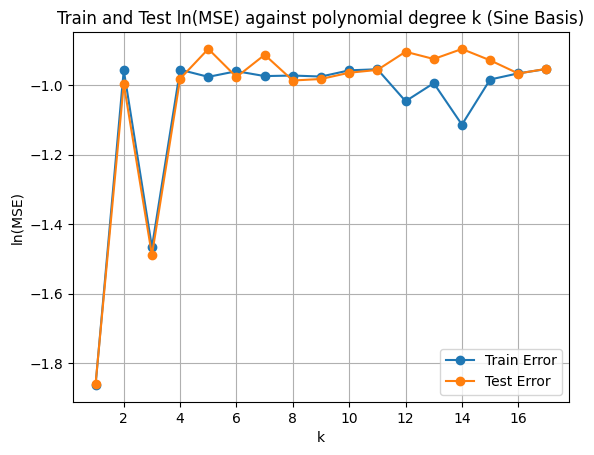

In [16]:
mse_train_array, mse_test_array = [], []
n_test = 1000
x_test_values = np.random.uniform(0, 1, n_test)
y_test_values = g_sigma(x_test_values) + np.random.normal(0, sigma, n_test)

for k in range(1, 18):
    # Use sine_basis_lrls to get beta, predictions, and SSE for training data
    beta, y_pred, sse_train = sine_basis_lrls(x_values, y_values, k)
    mse_train_array.append(sse_train / len(x_values))

    # Construct test design matrix with sine basis
    X_test = np.column_stack([np.sin(i * np.pi * x_test_values) for i in range(1, k + 1)])
    y_test_pred = X_test @ beta
    sse_test = np.sum((y_test_values - y_test_pred) ** 2)
    mse_test_array.append(sse_test / n_test)

# Calculate ln(MSE) for train and test arrays
ln_mse_train_array, ln_mse_test_array = np.log(mse_train_array), np.log(mse_test_array)

# Plot Train and Test ln(MSE) against k
plt.plot(range(1, 18), ln_mse_train_array, marker='o', label="Train Error")
plt.plot(range(1, 18), ln_mse_test_array, marker='o', label="Test Error")
plt.xlabel('k')
plt.ylabel('ln(MSE)')
plt.title('Train and Test ln(MSE) against polynomial degree k (Sine Basis)')
plt.legend()
plt.grid(True)
plt.show()


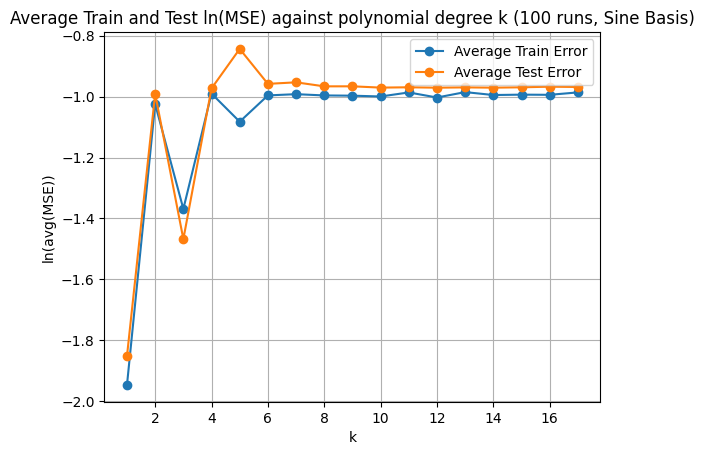

In [17]:
# Set parameters
n_runs = 100
n_test = 1000
degrees = range(1, 18)

# Initialize arrays to accumulate MSE values across runs
mse_train_sum = np.zeros(len(degrees))
mse_test_sum = np.zeros(len(degrees))

for _ in range(n_runs):
    # Generate a new training and test set for each run
    x_values = np.random.uniform(0, 1, n_points)
    y_values = g_sigma(x_values) + np.random.normal(0, sigma, n_points)

    x_test_values = np.random.uniform(0, 1, n_test)
    y_test_values = g_sigma(x_test_values) + np.random.normal(0, sigma, n_test)

    mse_train_run = []
    mse_test_run = []

    # Calculate MSE for each degree using sine basis
    for k in degrees:
        # Fit the model on the training data with sine_basis_lrls
        beta, _, sse_train = sine_basis_lrls(x_values, y_values, k)

        # Calculate training MSE
        mse_train = sse_train / len(x_values)
        mse_train_run.append(mse_train)

        # Apply the model to the test data with sine basis
        X_test = np.column_stack([np.sin(i * np.pi * x_test_values) for i in range(1, k + 1)])
        y_test_pred = X_test @ beta
        sse_test = np.sum((y_test_values - y_test_pred) ** 2)
        mse_test = sse_test / len(x_test_values)
        mse_test_run.append(mse_test)

    # Accumulate MSE values for averaging
    mse_train_sum += np.array(mse_train_run)
    mse_test_sum += np.array(mse_test_run)

# Calculate the average MSE across all runs
avg_mse_train = mse_train_sum / n_runs
avg_mse_test = mse_test_sum / n_runs

# Calculate the ln of the average MSE values
ln_avg_mse_train = np.log(avg_mse_train)
ln_avg_mse_test = np.log(avg_mse_test)

# Plot ln(avg(MSE)) for training and test sets against k
plt.plot(degrees, ln_avg_mse_train, marker='o', label="Average Train Error")
plt.plot(degrees, ln_avg_mse_test, marker='o', label="Average Test Error")
plt.xlabel('k')
plt.ylabel('ln(avg(MSE))')
plt.title('Average Train and Test ln(MSE) against polynomial degree k (100 runs, Sine Basis)')
plt.legend()
plt.grid(True)
plt.show()
